### Import Packages

In [184]:
from sklearn import svm, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import random

### Load Dataset

In [210]:
# Import Gaussian Small Dataset
data = np.loadtxt('/Users/elleemortensen/Documents/GitHub/BP24/Ellee/Data/gaussian_small_d_1.tex')
array = np.array(data)
df = pd.DataFrame(array)

          0         1         2         3         4         5         6    \
0    5.444140  3.835115  3.291091  5.501369  3.428899  4.922020  6.679717   
1    4.751552  7.292662  5.983595  6.379493  5.236658  5.765614  5.973641   
2    6.271994  6.196881  6.260575  5.059051  7.156964  5.242397  5.938668   
3    4.175813  3.704364  3.481604  4.074979  4.708090  5.923180  3.811577   
4    5.471645  5.372742  6.487397  5.160722  6.983509  5.484562  8.489674   
..        ...       ...       ...       ...       ...       ...       ...   
495  6.515782  6.464166  5.501283  6.732302  5.269133  6.618181  5.884162   
496  7.336528  6.595669  5.312352  6.044823  5.116878  5.240449  4.876616   
497  6.907411  7.031573  5.392985  6.665723  6.002096  5.260769  5.739866   
498  3.362284  4.530481  6.174449  3.252904  3.639634  5.220902  4.486876   
499  5.543395  8.342256  7.318517  6.244895  5.622331  5.563644  5.385929   

          7         8         9    ...       141       142       143  \
0  

### Set-Up and Iterations

In [188]:
# Set a seed for reproducibility
np.random.seed(42)

# Assume df is your DataFrame
totalrows = df.shape[0]
totalcolumns = 35

# Sample 500 rows from the DataFrame for consistent labels
testing_indices = np.random.permutation(totalrows)-1
sampled_df = df.iloc[testing_indices, :]

# Initialize an empty list to store F1 scores
f1_scores = []

# Initialize the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Maximum iterations allowed for sampling and evaluation
max_iterations = 100

# Initialize an array to store all F1 scores across iterations and samples
allf1scores = np.zeros((totalcolumns, max_iterations))

# Iterate over different numbers of sampled columns
for i in range(5, totalcolumns):
    iterations = 0
    # Sample the first 10*(i+1) rows for each iteration
    sampled_rows = sampled_df.iloc[:10 * (i + 1), :]
    while iterations < max_iterations:
        # Randomly sample (i+1) columns from the first 10*(i+1) rows (excluding the target column)
        sampled_columns = sampled_rows.drop(columns=[totalcolumns - 1]).sample(n=i + 1, axis='columns').columns
        
        # Split the dataset into training and testing sets using the sampled indices
        X_train = sampled_rows[sampled_columns]
        y_train = sampled_rows.iloc[:, -1]
        
        # Determine the test index
        test_index = np.ceil((10 * (i+1)) / 0.7).astype(int)
        X_test = sampled_df.iloc[10 * (i + 1):test_index, sampled_columns]
        y_test = sampled_df.iloc[10 * (i + 1):test_index, -1]
        
        # Train the SVM classifier using the training sets for the sampled columns
        clf.fit(X_train, y_train)
        
        # Predict the response for the test dataset
        y_pred = clf.predict(X_test)
        
        # Calculate the F1 score and store it in the allf1scores matrix
        f1 = metrics.f1_score(y_test, y_pred)
        allf1scores[i, iterations] = f1

        # Save the training and testing data at a specific condition for further analysis
        if i == 11 and iterations == 30:
            saved_X_train = X_train.copy()
            saved_y_train = y_train.copy()
            saved_X_test = X_test.copy()
            saved_y_test = y_test.copy()
        
        # Increment the iterations counter
        iterations += 1

In [218]:
stacked_x = np.vstack((cat_X_train, cat_X_test))
stacked_y = np.vstack((np.array(saved_y_train)[:,np.newaxis], np.array(saved_y_test)[:,np.newaxis]))

print(stacked_x.shape)
print(stacked_y.shape)
print(stacked_all.shape)

stacked_all = np.hstack((stacked_x, stacked_y))
print(stacked_all.shape)

(172, 12)
(172, 1)
(172, 13)
(172, 13)


In [190]:
# Select 4 random columns
random_columns = [101, 125, 8, 139]
print("Randomly selected columns:", random_columns)

# Create a copy of the saved_X_train variable
cat_X_train = saved_X_train.copy()

# Process the randomly selected columns into categorical
for col in random_columns:
    cat_X_train[col] = saved_X_train[col].round().astype(int).astype("category")

# Check if 4 columns were converted to categorical
print(cat_X_train.dtypes)

Randomly selected columns: [101, 125, 8, 139]
112     float64
55      float64
139    category
101    category
63      float64
17      float64
129     float64
125    category
73      float64
8      category
80      float64
31      float64
dtype: object


In [232]:
# Create a copy of the saved_X_test variable
cat_X_test = saved_X_test.copy()

# Process the randomly selected columns
for col in random_columns:
    cat_X_test[col] = saved_X_test[col].round().astype(int).astype("category")

# Check if 4 columns were coverted to categorical
print(cat_X_test.dtypes)
#np.savetxt('gaussmall.csv', stacked_all, delimiter=',')
print(stacked_all.shape)

112     float64
55      float64
139    category
101    category
63      float64
17      float64
129     float64
125    category
73      float64
8      category
80      float64
31      float64
dtype: object
(172, 13)


In [228]:
# Fit the SVM classifier using the training data with categorical features
clf.fit(cat_X_train, saved_y_train)

# Predict the response for the test dataset
y_pred = clf.predict(cat_X_test)

# Calculate the F1 score for the predictions
f1 = metrics.f1_score(saved_y_test, y_pred)

# Find the F1 score and check the shapes of the datasets
print(f1)
print(cat_X_train.shape)
print(cat_X_test.shape)
print(saved_y_train)
print(saved_y_test)

0.823529411764706
(120, 12)
(52, 12)
360    0.0
72     0.0
373    0.0
154    1.0
103    0.0
      ... 
280    0.0
246    0.0
236    0.0
116    0.0
41     0.0
Name: 150, Length: 120, dtype: float64
219    1.0
175    0.0
319    0.0
152    1.0
230    1.0
226    1.0
416    0.0
202    1.0
125    0.0
328    0.0
30     1.0
112    0.0
469    1.0
270    0.0
139    0.0
56     1.0
191    0.0
23     1.0
16     1.0
264    1.0
65     1.0
207    0.0
478    0.0
93     1.0
252    0.0
265    0.0
22     1.0
221    0.0
260    1.0
425    1.0
4      0.0
115    1.0
44     0.0
15     1.0
461    1.0
356    0.0
2      0.0
217    1.0
404    1.0
59     0.0
109    1.0
317    0.0
427    0.0
28     1.0
436    0.0
470    1.0
25     1.0
6      0.0
452    0.0
107    1.0
36     0.0
156    1.0
Name: 150, dtype: float64


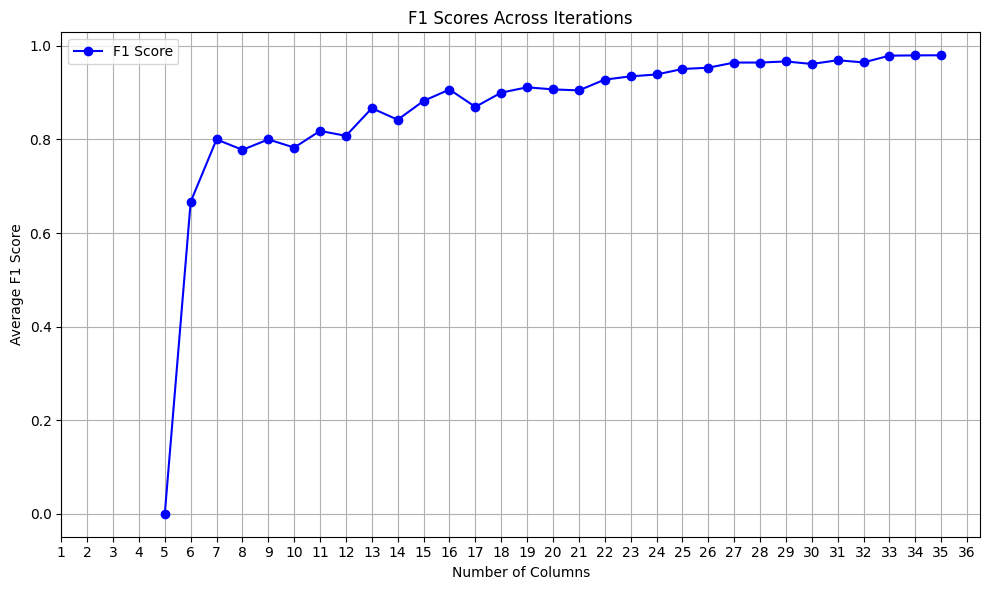

In [194]:
# Plotting the F1 scores across iterations
plt.figure(figsize=(10, 6))
plt.plot(range(5, totalcolumns+1), np.min(allf1scores[4:,:], axis=1), marker='o', linestyle='-', color='b', label='F1 Score')
plt.title('F1 Scores Across Iterations')
plt.xlabel('Number of Columns')
plt.ylabel('Average F1 Score')
plt.xticks(range(1, 37))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()